# Forth Stage

In [1]:
from get_data import *
from simulation import *
from optimization import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tqdm
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
target_stock_code = '0050'
target_side = 'bid'
res_dict = {}  # Target dictionary to store results, don't update this dictionary for testing different objective function params

In [3]:
files_df = get_path_df(stock_code=target_stock_code, side=target_side)
gb = files_df.groupby(['stock_code', 'side', 'ts', 'tm'])
iter_tqdm = tqdm.tqdm(gb, desc='Calculating', ncols=200, total=len(gb.groups))

### Optimization Result of 1 Set of Objective Function Params

In [5]:
obj_kwargs = {'lmda': 1, 't_func': lambda x: np.sqrt(x / 1000.)}

In [6]:
iter_tqdm = tqdm.tqdm(gb, desc='Calculating', ncols=200, total=len(gb.groups))
for k, df in iter_tqdm:
    iter_tqdm.set_description(f'Calculating[{"|".join(k)}]')
    if k not in res_dict.keys():
        res_dict[k] = get_sim_res(path_ls=df['path'].unique().tolist())
    res_score = obj(res_dict[k]['pnl'], res_dict[k]['duration'], **obj_kwargs)
    res_score = res_score[np.logical_and(~np.isnan(res_score), ~np.isinf(res_score))]
    res_dict[k].update({
        'scores': res_score, 
        'score_mean': np.nanmean(res_score), 
        'score_std': np.nanstd(res_score)
    })

Calculating[0050|bid|95|95]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 819/819 [00:04<00:00, 198.52it/s]


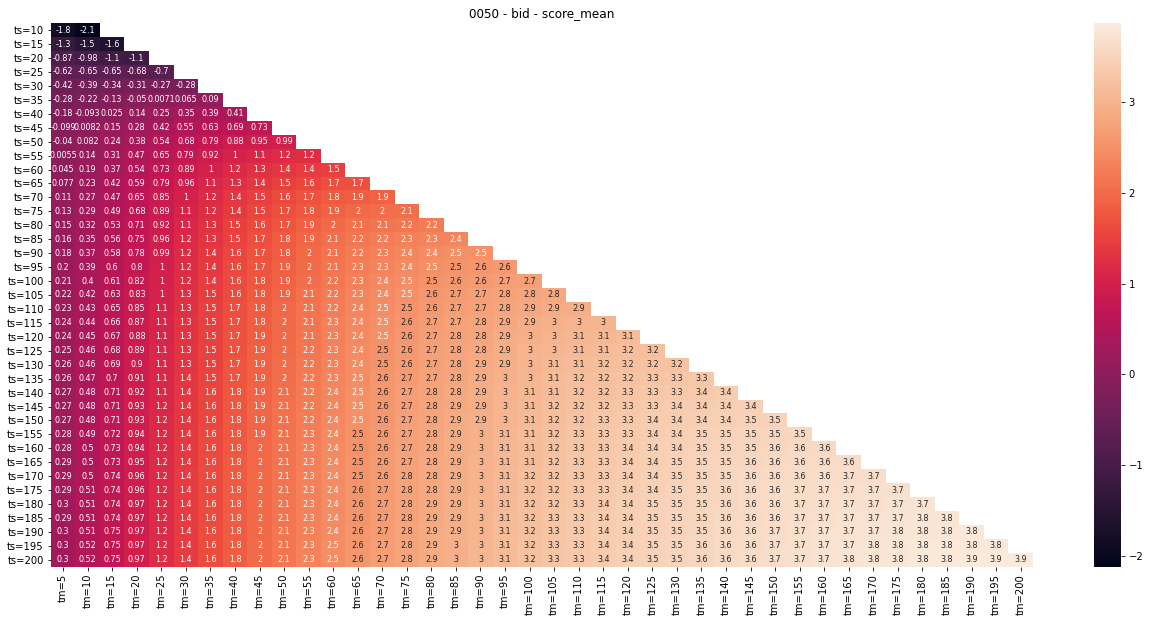

In [7]:
plot_heatmap(stock_code=target_stock_code, side=target_side, plot_attri='score_mean', res_dict=res_dict)

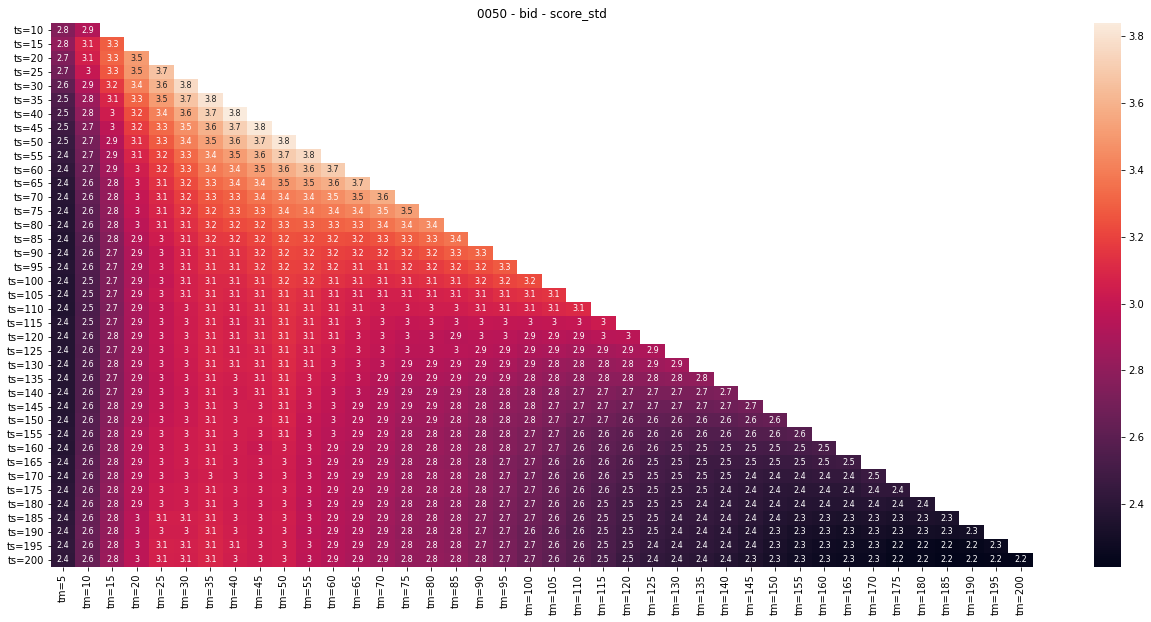

In [8]:
plot_heatmap(stock_code=target_stock_code, side=target_side, plot_attri='score_std', res_dict=res_dict)

### Only TAKE Cases

In [13]:
res_dict = {}
iter_tqdm = tqdm.tqdm(gb, desc='Calculating', ncols=200, total=len(gb.groups))
for k, df in iter_tqdm:
    iter_tqdm.set_description(f'Calculating[{"|".join(k)}]')
    
    # Case to filtered here
    take_cond = lambda xdf: xdf['case'] == 'TAKE'
    
    if k not in res_dict.keys():
        res_dict[k] = get_sim_res(path_ls=df['path'].unique().tolist(), cond=take_cond)
    res_score = obj(res_dict[k]['pnl'], res_dict[k]['duration'], **obj_kwargs)
    res_score = res_score[np.logical_and(~np.isnan(res_score), ~np.isinf(res_score))]
    res_dict[k].update({
        'scores': res_score, 
        'score_mean': np.nanmean(res_score), 
        'score_std': np.nanstd(res_score)
    })

Calculating[0050|bid|95|95]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 819/819 [00:06<00:00, 135.57it/s]


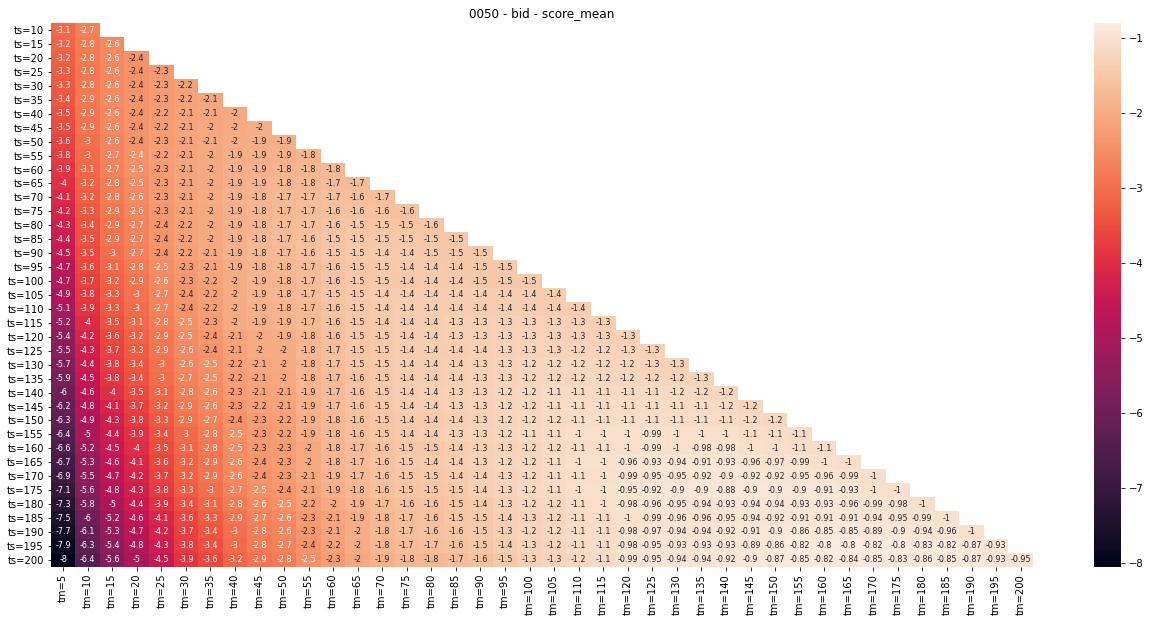

In [14]:
plot_heatmap(stock_code=target_stock_code, side=target_side, plot_attri='score_mean', res_dict=res_dict)

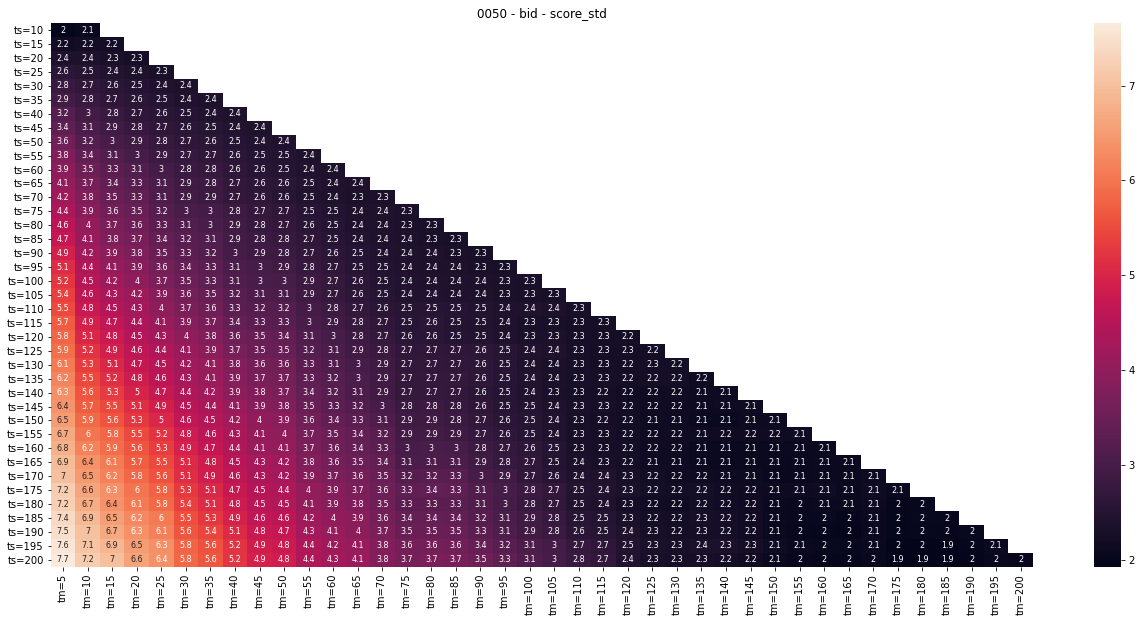

In [15]:
plot_heatmap(stock_code=target_stock_code, side=target_side, plot_attri='score_std', res_dict=res_dict)